In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'

In [3]:
Epot = np.loadtxt("Epot.dat")

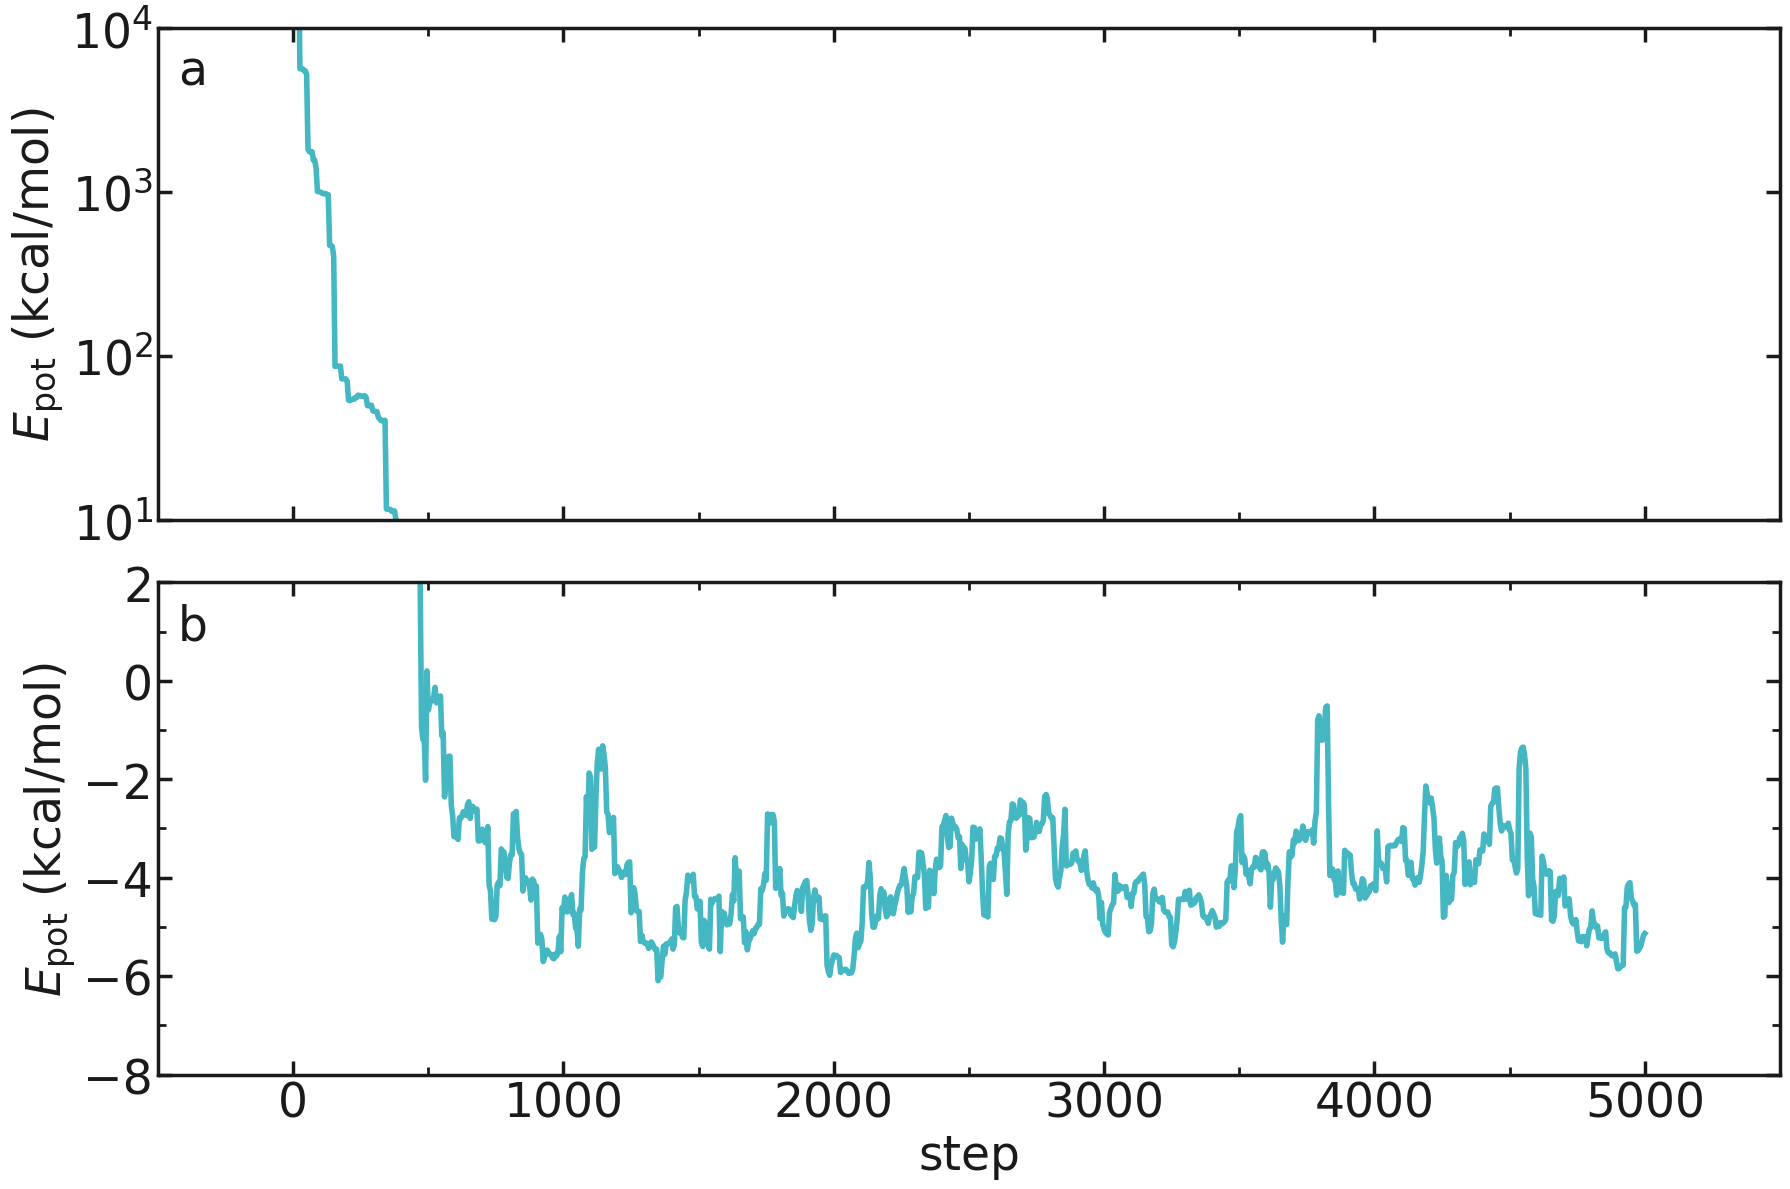

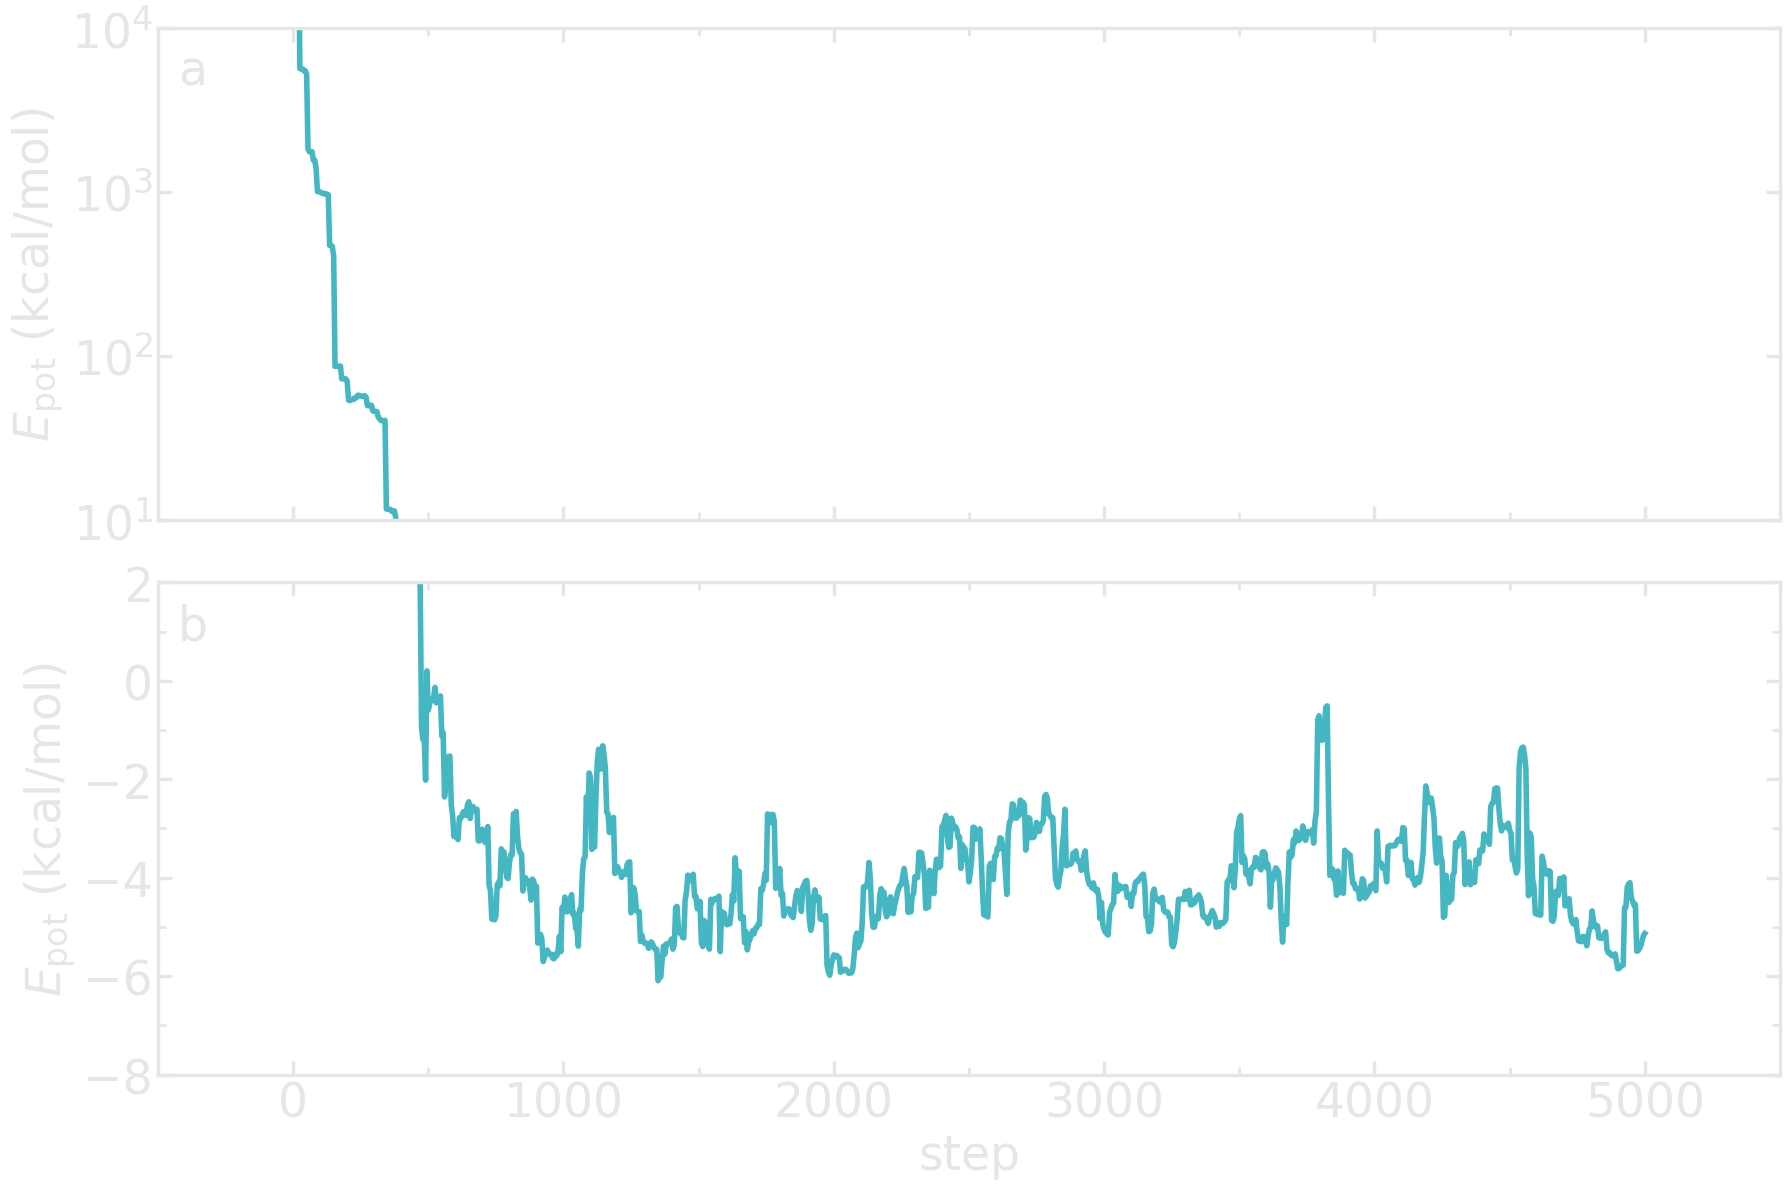

In [26]:
filename = "Epot-vs-time"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogy(Epot[:,0], Epot[:,1], '-', color=colors["mycyan"],
                markersize=10, linewidth=4)
    complete_panel(ax[-1], None, r'$E_\mathrm{pot}$ (kcal/mol)',
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_boundaries=(-500, 5500), y_boundaries=(10, 10000))
                   #x_ticks=np.arange(-100, 6100, 1), x_boundaries=(0, 6.1),
                   #y_ticks=np.arange(-1., 1.25, 0.5), y_boundaries=(-1.055, 1.055))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Epot[:,0], Epot[:,1], '-', color=colors["mycyan"],
                markersize=10, linewidth=4)
    complete_panel(ax[-1], r'step', r'$E_\mathrm{pot}$ (kcal/mol)',
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_boundaries=(-500, 5500), y_boundaries=(-8, 2))
    #set_boundaries(plt, x_ticks=np.arange(0, 6.1, 1), x_boundaries=(0, 6.1),
    #               y_ticks=np.arange(-1., 1.25, 0.5), y_boundaries=(-1.055, 1.055))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)